#Exploring Multi Layer Perceptron with Kuzhushiji MNIST dataset

This individual assignment has two parts and is 15 marks in total. Submission deadline is 1st June (Wednesday), 12PM. Submission link (via Google Form) will be updated on Spectrum.

Again,there are no extra marks for early submission. If you are able to complete it rather quickly, consider how relatively easy you find the assignment to be and the fact that it is done and dusted as a reward itself.



#Background
In this assignment we will be creating a Multi Layer Perceptron to classify the Kuzushiji MNIST dataset. The repo (with links to the original paper) is as below.


https://github.com/rois-codh/kmnist


This dataset is somewhat similar to the MNIST dataset. Very balanced, very clean dataset. So, not much of a problem. 


###**Notes**
* For each task and questions, there will be sample outputs. Sample outputs are often 'snippets' of the whole answer. Your answers do not have to match the sample outputs (most likely won't as your network is unique). But you are expected to produce outputs following the format shown by the sample outputs. 

* To enable GPU in colab, select Runtime-Change runtime type-GPU

* Once you've trained your model, you probably want to save it so that it can be reused later. To save the weights of the models

```
torch.save(model.state_dict(), "./model.weights")
from google.colab import files
files.download('model.weights')
```

* To load your downloaded weights to colab

```
from google.colab import files
uploaded = files.upload() #select the saved model.weights
```
 
* PyTorch doesn't save the model structure by default.So you need to copy paste your model class, build the model and load the weights



```
# build the model and load state
model = MLP()
model.load_state_dict(torch.load('model.weights'))
model = model.eval() 
```

If you are working locally, then https://pytorch.org/tutorials/beginner/saving_loading_models.html

* Please use PyTorch and not Tensorflow or Keras. This is because one of the learning goal is to asses how well students can master PyTorch.




# Task 1. Design and Implement MLP of your design to classify the Kuzushiji MNIST dataset. Train, validate, test.

* You are free to use any number and size of hidden layers and activation function. 
* The objective is to try and get the highest accuracy as possible without overfitting.
* Although implementing CNN is tempting, please stick to the basic MLP 
* Briefly explain your choices of data pre processing/transformation and hyperparameters by commenting in your code
* Design and train your model (like we did before)
* As Kuzushiji MNIST is similar to MNIST, you can apply the same transformation/data preprocessing. 
* If you have taken steps to reduce the training time, increase accuracy, improve generalizability, please briefly explain your methods/strategies.






### Check 1. Visualize a few sample images from the dataset

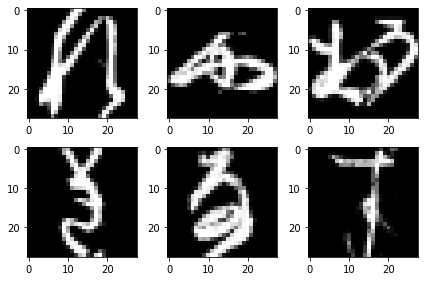

### Check 2. Check the number of instances of each labels in both training and test dataset.

This should be easy and straight forward. Nevertheless let's just check.


```
///////////Training dataset//////////
--Number of instances for each classes--
Label a : 6000
Label ka : 6000
Label sa : 6000
Label ta : 6000
Label na : 6000
Label ha : 6000
Label ma : 6000
Label yu : 6000
Label o : 6000
Label wa : 6000

Check total, should tally with number of samples
60000.0

///////////Test dataset//////////
--Number of instances for each classes--
Label a : 1000
Label ka : 1000
Label sa : 1000
Label ta : 1000
Label na : 1000
Label ha : 1000
Label ma : 1000
Label yu : 1000
Label o : 1000
Label wa : 1000

Check total, should tally with number of samples
10000.0


```

### Check 3. Visualize loss for one model of your choice

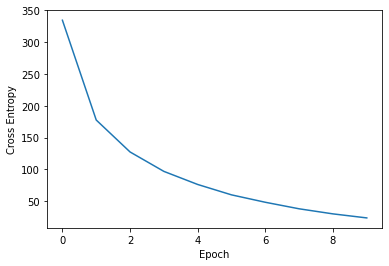

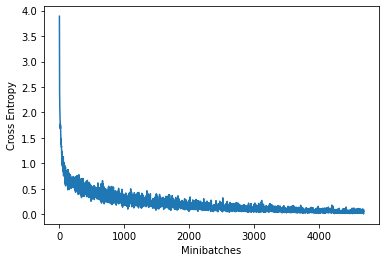

### Check 4 Training  and test accuracy
```
Model 1 . Simple MLP 3 layer
Training: 
number of data 60000
number of wrongly predicted label 369
accuracy 99.38%

Test: 
number of data 10000
number of wrongly predicted label 954
accuracy 90.46%

MOdel 2. Deeper MLP 4 layers with hidden sizes reducing as the layer progress
Training: 
number of data 60000
number of wrongly predicted label 356
accuracy 99.41%

Test: 
number of data 10000
number of wrongly predicted label 912
accuracy 90.88%

```

### Q1. What are the combinations of parameters-hyperparameters that allows you to achieve the highest accuracy without overfitting?

Parameters-Hyperparameters are: #weights, #hidden layers, #hidden neurons #epoch, optimizing strategy, learning rate (if applicable), minibatch size, training size,validation size, test size.

Make a table where the columns are the  parameters-hyperparameters settings as above and rows are  your different model you have experimented

Sample Output 

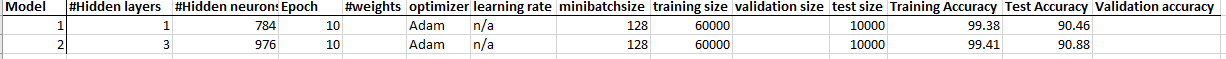









In the sample output above, validation data is missing. Please insert yours. **Experiment with at least 10 models**

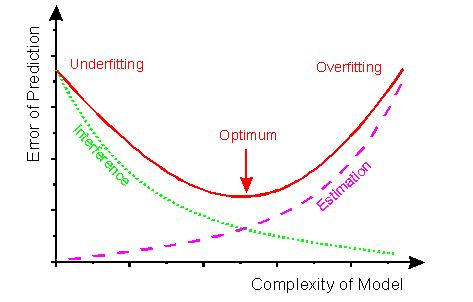

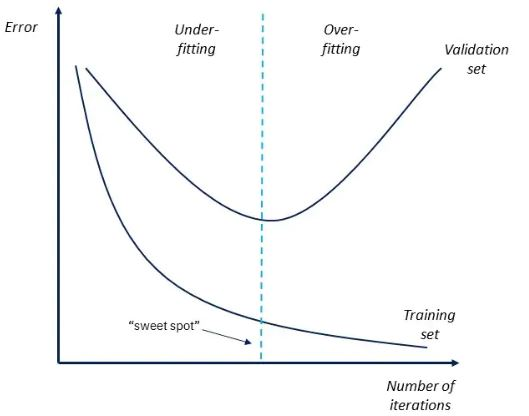

**26 May Updated: Overtfitting**

Overfitting can happens in two situations (shown in figure below). One is when the size of epoch is too large and the loss/eror tends to saturate. Second is when the complexity of the model increases (which can be referred as the number of parameters in a model. The larger the number of parametes, the more complex the model is) . In both cases, the loss/error on the validation set will tend to increase instead of keep decreasing once the model starts to overfit.

# Task 2. Compute Shannon Entropy



## Q1. Create probability distribution of the train data P(x)
Each pixel position is treated as one features. Since we have 28*28 = 784 pixels this is equivalent to having 784 features. Each pixel position or features can take up a pixel values of 0-255. Given the training data of 60k samples and test data of 10k, what is the distribution of pixel values for each pixel position/feature?

Computing probability will result in some P(x)=0. This will be problematic when computing the Shannon entropy as log2[P(x)=0] = infinity as we will see later. There will be numerical approximation errors when summing up P(x)


```
def compute_probability_dist(dataset):
```

If you are working with numpy, you need to do

```
train_np = train.data.numpy()
```


## Q2. Create probability distribution of the test data Q(x)

You can reuse the function created above 

```
probability_test = compute_probability_dist(test_data)
```

## Q3. Visualize P(x) and Q(x) for pixel position/feature #123

In this example, pixel position of #123 is selected. Then plot probability distribution of the training data P(x) and test data Q(x)

As we can see some pixel position like #0 which is at the top left corner of the image, is always 0, i.e P(x=0|pixel position=#0) = 1. Hence feature #0 is non informative (as we will measure by Shannon entropy). While some pixel position/features like #180 is highly likely to have a high pixel intensity.



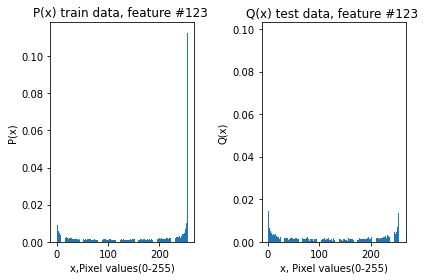

## Q4 Compute the Shannon Entropy
In this task, we will compute the entropy for both training and test distribution. Things to take be careful are


1.   When P(x)=0 or Q(x)=0, this will cause -log2[0]=infinity as when the
probability is zero, it is very uncertain and therefore the amount of information is infinity.

2. When P(x)=1 as in the case of feature #0, -log2[1]= 0 as when the probability=1, it is absolutely certain and there is no information gain here.

3. So the right way to process is to leave P(x)=0 as it is, but deal with it when calculating log2[P(x)]

```
def compute_entropy(probability_dist): 
```

```
Entropy for train data H(x): 2447.150658798105
Entropy for test data H(x) 2407.1840029090063
```

### Q4 a) Plot the -P(X)log2[P(x)] (training) and -Q(X)log2[Q(x)] (testing). 

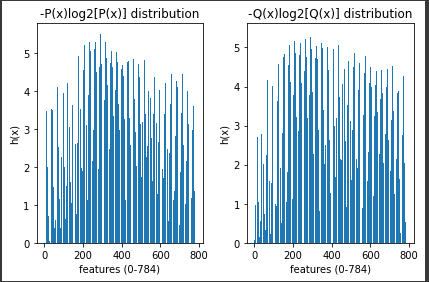

### Q4 b) What is the best way to measure the difference between entropy of training vs test dataset that you have computed? 

# My Code

In [ ]:
import torch
import torch.nn.functional as F
import torch.nn as nn
import os
import math
import numpy as np
import matplotlib.pyplot as plt
from torchvision import datasets
from torchvision import io
from torchvision import models
from torchvision import ops
from torchvision import transforms
from torchvision import utils
from torch.utils.data import DataLoader


In [ ]:
seed = 7
torch.manual_seed(seed)
np.random.seed(seed)

In [ ]:
dataset = datasets.KMNIST(".", train = True, download = True)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:75: UserWarning: train_data has been renamed data
  warnings.warn("train_data has been renamed data")


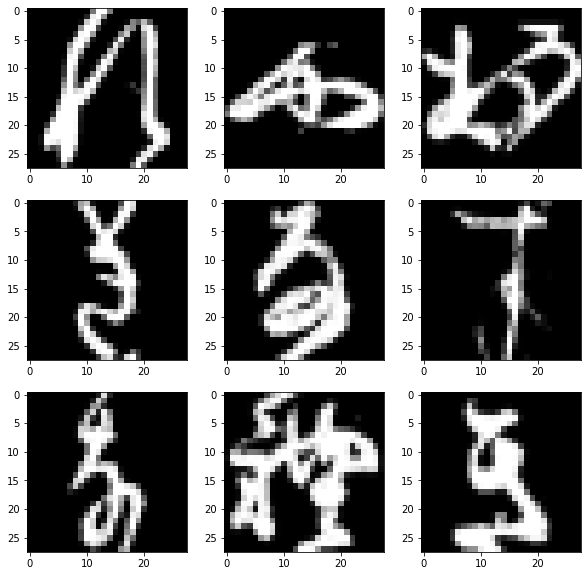

In [ ]:
plt.figure(figsize=(10,10)) # specifying the overall grid size

for i in range(9):
    plt.subplot(3,3,i+1)    # the number of images in the grid is 5*5 (25)
    plt.imshow(dataset.train_data[i],cmap=plt.get_cmap('gray'))

plt.show()

In [ ]:
print(dataset.classes)

['o', 'ki', 'su', 'tsu', 'na', 'ha', 'ma', 'ya', 're', 'wo']


In [ ]:
unique_values, counts = torch.unique(dataset.train_labels,return_counts=True)

/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
print("-------------Number of instances for each class-------------")

for unique_value, count in zip(unique_values,counts):
    print(f'Label {dataset.classes[unique_value]}: {count}')

-------------Number of instances for each class-------------
Label o: 6000
Label ki: 6000
Label su: 6000
Label tsu: 6000
Label na: 6000
Label ha: 6000
Label ma: 6000
Label ya: 6000
Label re: 6000
Label wo: 6000


In [ ]:
print("-------------Total samples-------------")
print(f'total samples: {sum(counts)}')

-------------Total samples-------------
total samples: 60000


In [ ]:
print("-----------Percentages of instances for each class-----------")
for unique_value, count in zip(unique_values,counts):
    print(f'Label {dataset.classes[unique_value]}: {(count/sum(counts))*100:.2f}%')

-----------Percentages of instances for each class-----------
Label o: 10.00%
Label ki: 10.00%
Label su: 10.00%
Label tsu: 10.00%
Label na: 10.00%
Label ha: 10.00%
Label ma: 10.00%
Label ya: 10.00%
Label re: 10.00%
Label wo: 10.00%


In [ ]:
transformCustom = transforms.Compose([
                                transforms.ToTensor(), #this convert to tensor
                                transforms.Lambda(lambda x:x.view(-1))  #this flatten 28*28 into a 784 vector for each image
])


train = datasets.KMNIST(root='.',train=True,transform=transformCustom, download=True)
test = datasets.KMNIST(root='.', train=False, transform=transformCustom,download=True)

In [ ]:
#Set DataLoader

training_data, validation_data = torch.utils.data.random_split(train, [50000, 10000])
batchSize = 512  # Rule of thumb is to set to the power of 2. In this case 2^7
train_loader = DataLoader(training_data, batch_size=batchSize,shuffle=True)
validation_loader = DataLoader(validation_data,batch_size=batchSize,shuffle=False)
test_loader = DataLoader(test,batch_size=batchSize, shuffle=False) # no need to shuffle test data

In [ ]:
print(validation_loader.dataset.dataset.data.size(dim=0))

60000


In [ ]:
# shape of train data and label

print(train_loader.dataset.dataset.data.size()[0])
print(train_loader.dataset.dataset.train_labels.size()[0])

60000
60000


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:65: UserWarning: train_labels has been renamed targets
  warnings.warn("train_labels has been renamed targets")


In [ ]:
# Show the number of batches

count = 0
for xb, yb in train_loader:
  count+=1
print(f'There are {count} batches in train_loader')

There are 98 batches in train_loader


In [ ]:
count=0
for x, y in test_loader:
  count += 1
print(f'There are {count} batches in test_loader') 

There are 20 batches in test_loader


In [ ]:
class MLP(nn.Module):
  def __init__(self,input_size, hidden_size,num_classes):
    super(MLP,self).__init__()

    self.layer1 = nn.Linear(input_size,hidden_size) 
    self.layer2 = nn.Linear(hidden_size,num_classes)

  def forward(self,x): 

    out = self.layer1(x)
    #out = F.sigmoid(out) 
    out = torch.sigmoid(out)
    out = self.layer2(out)
 
    if not self.training:
      out = F.softmax(out,dim=1)
    return out

In [ ]:
class MLP_2_layer(nn.Module):
  def __init__(self,input_size, hidden_size,hidden_size2,num_classes):
    super(MLP,self).__init__()

    self.layer1 = nn.Linear(input_size,hidden_size) 
    self.layer2 = nn.Linear(hidden_size,hidden_size2)
    self.layer3 = nn.Linear(hidden_size2,num_classes)

  def forward(self,x): 

    out = self.layer1(x)
    #out = F.sigmoid(out) 
    out = torch.sigmoid(out)
    out = self.layer2(out)
    out = torch.sigmoid(out)
    out = self.layer3(out)
 
    if not self.training:
      out = F.softmax(out,dim=1)
    return out

In [ ]:
class MLP_3_layer(nn.Module):
  def __init__(self,input_size, hidden_size,hidden_size2,hidden_size3, num_classes):
    super(MLP,self).__init__()

    self.layer1 = nn.Linear(input_size,hidden_size) 
    self.layer2 = nn.Linear(hidden_size,hidden_size2)
    self.layer3 = nn.Linear(hidden_size2,hidden_size3)
    self.layer4 = nn.Linear(hidden_size3,num_classes)

  def forward(self,x): 

    out = self.layer1(x)
    #out = F.sigmoid(out) 
    out = torch.sigmoid(out)
    out = self.layer2(out)
    out = torch.sigmoid(out)
    out = self.layer3(out)
    out = torch.sigmoid(out)
    out = self.layer4(out)
 
    if not self.training:
      out = F.softmax(out,dim=1)
    return out

In [ ]:
def evaluate_model(data_loader,validation=False): 

  try:
    size = data_loader.dataset.dataset.data.size(dim=0)
  except:
    size = data_loader.dataset.data.size()[0]

  if(validation == True):
    size = len(validation_data)

  correct_pred = 0
  loss = 0

  for input_batch, target_batch in data_loader: #data_loader can take train or test dataset
    predict_batch = model(input_batch)

    if validation == True:
      loss_batch = loss_fn(predict_batch,target_batch)
      loss += loss_batch.item()

    prediction_classes = torch.argmax(predict_batch,dim=1)
    correct_pred += np.sum(prediction_classes.numpy() == target_batch.numpy())

  accuracy = correct_pred/size


  print(f'number of evaluated data: {size}')
  print(f'number of wrongly predicted label: {size-correct_pred}')
  print(f'accuracy : {(accuracy)*100:.2f}%')

  return accuracy, loss

In [ ]:
torch.manual_seed(seed)
model = MLP(784, 784, 10)
# model = MLP_2_layer(784, 784,392, 10)
# model = MLP_3_layer(784, 784,392,196, 10)

loss_fn = nn.CrossEntropyLoss() 
opt = torch.optim.AdamW(model.parameters(),lr=0.001)

epochSize = 15
loss_history = []
loss_minibatch_history = []
validation_loss_history = []
validation_accuracy_history = []

for epoch in range(epochSize): 

  model.train()
  loss = 0
  # 6. Load the data 
  for input_batch, target_batch in train_loader:

    #7. Zero the gradients
    opt.zero_grad() 
    
    #8. Forward pass
    predict_batch = model(input_batch) 
    
    #9. Compute loss
    loss_batch = loss_fn(predict_batch,target_batch)  
    
    #10. Backward pass and update weights
    loss_batch.backward() 
    opt.step()

    loss_minibatch_history.append(loss_batch.item())
    loss += loss_batch.item() #store the loss

    
  loss_history.append(loss)

  model.eval()
  v_acc, v_loss = evaluate_model(validation_loader,validation = True)

  validation_accuracy_history.append(v_acc)
  validation_loss_history.append(v_loss)

  print(f'Epoch: {epoch+1}  loss: {loss}')

number of evaluated data: 10000
number of wrongly predicted label: 1937
accuracy : 80.63%
Epoch: 1  loss: 102.1540715098381
number of evaluated data: 10000
number of wrongly predicted label: 1617
accuracy : 83.83%
Epoch: 2  loss: 57.40328186750412
number of evaluated data: 10000
number of wrongly predicted label: 1390
accuracy : 86.10%
Epoch: 3  loss: 47.68072724342346
number of evaluated data: 10000
number of wrongly predicted label: 1186
accuracy : 88.14%
Epoch: 4  loss: 40.235965728759766
number of evaluated data: 10000
number of wrongly predicted label: 1035
accuracy : 89.65%
Epoch: 5  loss: 34.66748431324959
number of evaluated data: 10000
number of wrongly predicted label: 930
accuracy : 90.70%
Epoch: 6  loss: 30.238517180085182
number of evaluated data: 10000
number of wrongly predicted label: 852
accuracy : 91.48%
Epoch: 7  loss: 26.84537246823311
number of evaluated data: 10000
number of wrongly predicted label: 798
accuracy : 92.02%
Epoch: 8  loss: 23.892671644687653
number o

Text(0, 0.5, 'loss')

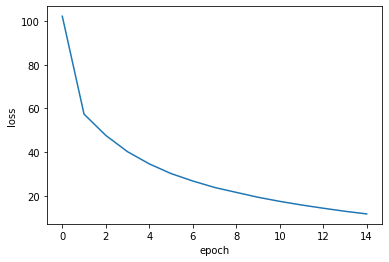

In [ ]:
#plot the loss by epochs

plt.plot(loss_history)
plt.xlabel("epoch")
plt.ylabel("loss")

Text(0, 0.5, 'loss')

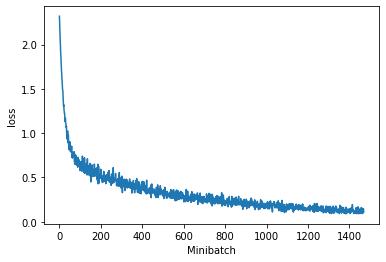

In [ ]:
#plot the loss by minibatches

plt.plot(loss_minibatch_history)
plt.xlabel("Minibatch")
plt.ylabel("loss")

Text(0, 0.5, 'validation_loss')

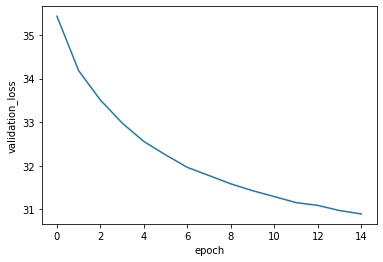

In [ ]:
#plot validation loss

plt.plot(validation_loss_history)
plt.xlabel("epoch")
plt.ylabel("validation_loss")

Text(0, 0.5, 'validation_accuracy')

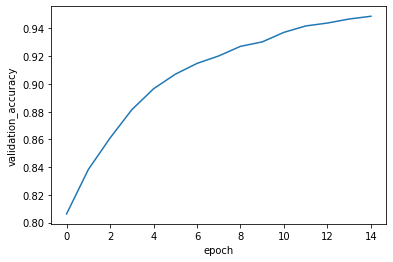

In [ ]:
#plot validation accuracy

plt.plot(validation_accuracy_history)
plt.xlabel("epoch")
plt.ylabel("validation_accuracy")

In [ ]:
# evaluate using training datasets

model.eval() # sets the model in evaluation mode 
acc, _ = evaluate_model(train_loader,validation = False)

number of evaluated data: 60000
number of wrongly predicted label: 11319
accuracy : 81.14%


In [ ]:
# evaluate using validation datasets

model.eval()
acc, _ = evaluate_model(validation_loader, validation = True)

number of evaluated data: 10000
number of wrongly predicted label: 512
accuracy : 94.88%


In [ ]:
# evaluate using test datasets

model.eval() # sets the model in evaluation mode 
acc, _ = evaluate_model(test_loader, validation = False)

number of evaluated data: 10000
number of wrongly predicted label: 1249
accuracy : 87.51%


In [ ]:
def display_prediction(data_loader,img_num): 
  
  i = 0
  image_list = []
  label_list = []
  pred_label_list = []

  for input_batch,target_batch in iter(data_loader): #data_loader can take train or test dataset
    if(i == img_num):
      break

    predict_batch = model(input_batch)

    prediction_class = torch.argmax(predict_batch,dim=1)

    img = input_batch.reshape(28,28)

    label = data_loader.dataset.classes[int(target_batch.numpy())]
    pred_label = data_loader.dataset.classes[int(prediction_class.numpy())]

    image_list.append(img)
    label_list.append(label)
    pred_label_list.append(pred_label)

    i += 1

  for i in range(len(image_list)):
    plt.figure(figsize=(3,3))
    # plt.subplot(3,3,i+1)
    plt.title(f'Class:{label_list[i]} II Prediction:{pred_label_list[i]}')
    plt.imshow(image_list[i],cmap=plt.get_cmap('gray'))

  plt.show()

In [ ]:
selftest_loader = DataLoader(test,batch_size=1, shuffle=False)

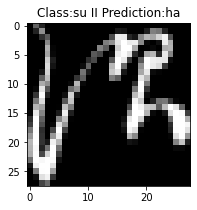

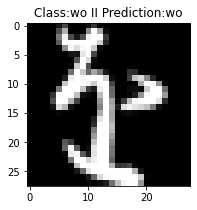

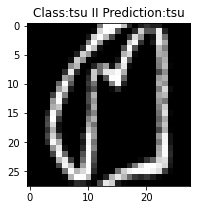

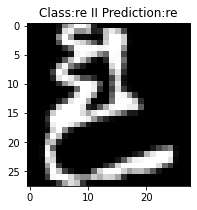

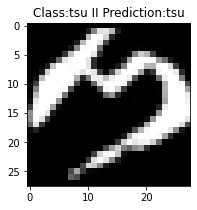

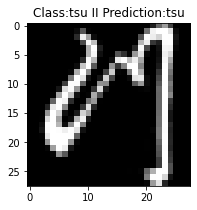

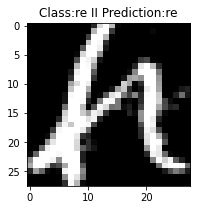

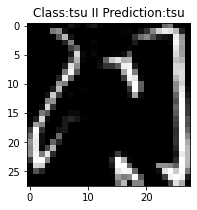

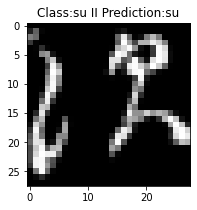

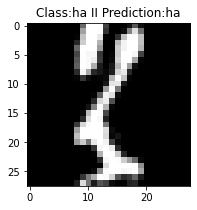

In [ ]:
model.eval()
display_prediction(selftest_loader,10)

In [ ]:
def count_parameters(model):
  return sum(p.numel() for p in model.parameters())

In [ ]:
# calculate number of weights

print(count_parameters(model))

623290


# Task 2

### Creating Probability Distribution

In [ ]:
train_pixels = train.data.numpy()
test_pixels = test.data.numpy()

In [ ]:
''' 
    This method will accept a numpy array as input 
    and return a numpy array consist of all probability
    distributions (for each pixel position)
'''

def compute_probability(dataset):
  all_pixels = dataset.reshape(dataset.shape[0],-1)
  # print(all_pixels.shape)

  pixel_values = np.unique(all_pixels)
  pixel_values = np.append(pixel_values,[256],axis=0) # to make sure value 255 in np.histogram is reached
  # print(pixel_values) #get all pixel values possible (0-255)

  prob_dist = []

  for index in range(all_pixels.shape[1]):
    freq, bins = np.histogram(all_pixels[:, index],pixel_values) #count the frequencies for each index/bins stated at particular index/column in numpy array
    # print(freq)
    # print(bins)

    prob = freq / all_pixels.shape[0]

    prob_dist.append(prob)

  prob_dist = np.array(prob_dist)

  return prob_dist, pixel_values

### Creating Probability Distributioon of the train P(x) and test Q(x) data

In [ ]:
train_probability_dist, train_bin = compute_probability(train_pixels)
test_probability_dist, test_bin = compute_probability(test_pixels)

In [ ]:
print(train_probability_dist.shape)
print(train_probability_dist[0].shape)
print(train_probability_dist[0])

(784, 256)
(256,)
[9.94100000e-01 5.00000000e-04 2.66666667e-04 2.83333333e-04
 1.50000000e-04 1.66666667e-04 1.83333333e-04 1.00000000e-04
 5.00000000e-05 1.00000000e-04 1.00000000e-04 6.66666667e-05
 5.00000000e-05 1.33333333e-04 1.33333333e-04 3.33333333e-05
 8.33333333e-05 8.33333333e-05 6.66666667e-05 3.33333333e-05
 1.16666667e-04 1.66666667e-05 5.00000000e-05 3.33333333e-05
 6.66666667e-05 3.33333333e-05 5.00000000e-05 5.00000000e-05
 5.00000000e-05 1.66666667e-05 1.00000000e-04 6.66666667e-05
 1.66666667e-05 0.00000000e+00 3.33333333e-05 5.00000000e-05
 0.00000000e+00 8.33333333e-05 1.66666667e-05 1.66666667e-05
 1.66666667e-05 0.00000000e+00 6.66666667e-05 0.00000000e+00
 5.00000000e-05 3.33333333e-05 5.00000000e-05 1.66666667e-05
 0.00000000e+00 5.00000000e-05 5.00000000e-05 3.33333333e-05
 1.66666667e-05 0.00000000e+00 1.66666667e-05 0.00000000e+00
 1.66666667e-05 1.66666667e-05 3.33333333e-05 3.33333333e-05
 0.00000000e+00 0.00000000e+00 3.33333333e-05 3.33333333e-05
 1.666

### Visualizing P(x) for pixel position #123

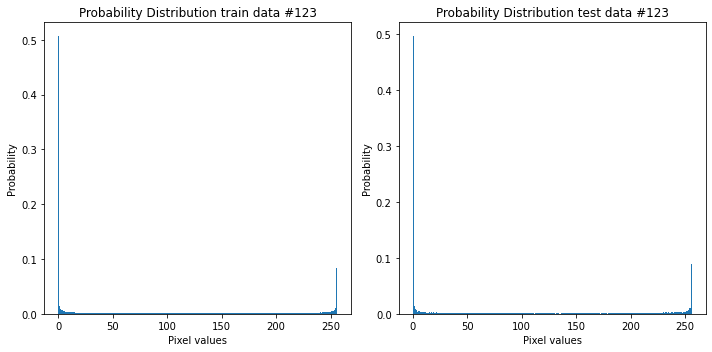

In [ ]:
pixel_index = 122

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

ax1.hist(train_bin[:-1], train_bin, weights=train_probability_dist[pixel_index])
ax1.set_title(f'Probability Distribution train data #{pixel_index+1}') 
ax1.set_xlabel("Pixel values")
ax1.set_ylabel("Probability")


ax2.hist(test_bin[:-1], test_bin, weights=test_probability_dist[pixel_index])
ax2.set_title(f'Probability Distribution test data #{pixel_index+1}') 
ax2.set_xlabel("Pixel values")
ax2.set_ylabel("Probability")

plt.tight_layout()

## Compute the Shannon Entropy

In [ ]:
''' 
    This method will accept an array as input (probability distribution)
    and return the summation entropy value and all entropy value for each
    feature/pixel
'''

def compute_entropy(prob_dist):
  entropy_list = []

  for prob in prob_dist:
    entropy = sum(-1*p*math.log(p,2) for p in prob if p > 0)
    entropy_list.append(entropy)

  entropy_list = np.array(entropy_list)
  sum_entropy = np.sum(entropy_list)
  return entropy_list,sum_entropy


In [ ]:
train_ent_hist, train_ent = compute_entropy(train_probability_dist)
print(f'Entropy for train data H(x): {train_ent}')

Entropy for train data H(x): 2447.1506587981057


In [ ]:
test_ent_hist, test_ent = compute_entropy(test_probability_dist)
print(f'Entropy for train data H(x): {test_ent}')

Entropy for train data H(x): 2407.1840029090085


In [ ]:
print(train_ent_hist.shape)
train_ent_hist

(784,)


array([0.0895588 , 0.16458159, 0.26130604, 0.39351536, 0.59963562,
       0.87885991, 1.23728993, 1.62892182, 2.03865259, 2.43851124,
       2.825307  , 3.20288528, 3.4651016 , 3.55357147, 3.41686392,
       3.07092999, 2.54436874, 1.99952839, 1.60492879, 1.32814015,
       1.1153376 , 0.90989868, 0.70810776, 0.51942035, 0.34135825,
       0.19659485, 0.1100046 , 0.05483776, 0.16585977, 0.27761792,
       0.41145858, 0.60405953, 0.90852106, 1.31199477, 1.77065568,
       2.24939815, 2.72734213, 3.14895819, 3.53076645, 3.80134834,
       3.94048413, 3.92182146, 3.79053353, 3.51358706, 3.03844586,
       2.50629271, 2.05375643, 1.71049525, 1.47624451, 1.27648479,
       1.0661678 , 0.83847566, 0.59760759, 0.38569628, 0.22013411,
       0.10953276, 0.26078972, 0.4198254 , 0.60061446, 0.87027427,
       1.2647202 , 1.7807914 , 2.30145792, 2.82493627, 3.28483311,
       3.63516077, 3.88573271, 4.05744591, 4.13181594, 4.10771373,
       4.02080123, 3.85015   , 3.49126779, 2.99491965, 2.51905

### plotting shannon entropy for train and test data

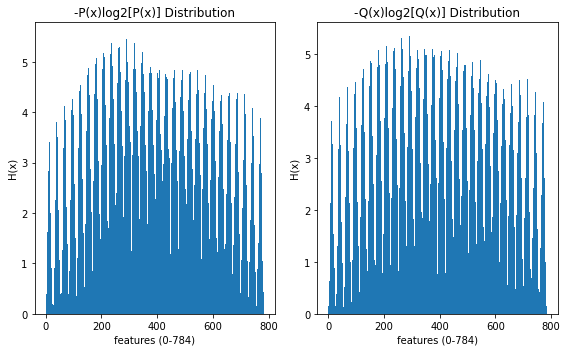

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8,5))

ax1.hist(range(0,784), range(0,785), weights=train_ent_hist)
ax1.set_title(f'-P(x)log2[P(x)] Distribution') 
ax1.set_xlabel("features (0-784)")
ax1.set_ylabel("H(x)")


ax2.hist(range(0,784), range(0,785), weights=test_ent_hist)
ax2.set_title(f'-Q(x)log2[Q(x)] Distribution')
ax2.set_xlabel("features (0-784)")
ax2.set_ylabel("H(x)")

plt.tight_layout()

### Q4 b) What is the best way to measure the difference between entropy of training vs test dataset that you have computed? 

In [ ]:
'''
    Answer: I think the best way to measure the difference between entropy of training vs test dateset is to calculate the difference of entropy by each features.
    For example, entropy difference between pixel #123 training dataset and pixel #123 test dataset. This is due to calculating the whole entropy difference
    might get less information of which pixels are actually has big difference. 

    like stated below, we can see that the highest difference is at pixel 392
'''

'\n    Answer: I think the best way to measure the difference between entropy of training vs test dateset is to calculate the difference of entropy by each features.\n    For example, entropy difference between pixel #123 training dataset and pixel #123 test dataset. This is due to calculating the whole entropy difference\n    might get less information of which pixels are actually has big difference. \n\n    like stated below, we can see that the highest difference is at pixel 392\n'

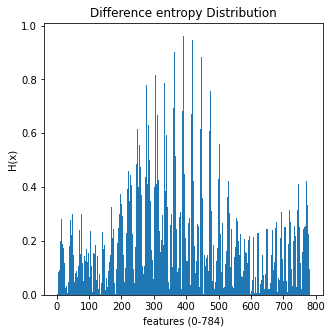

The highest entropy difference is at #392 feature which is : 0.9615357987574242


In [ ]:
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(5)

x = np.array(range(0,784))
y = np.array(abs(train_ent_hist-test_ent_hist))
plt.hist(x, range(0,785), weights=y)
plt.title(f'Difference entropy Distribution')
plt.xlabel("features (0-784)")
plt.ylabel("H(x)")

max_y = max(y)
xpos = np.where(y == max_y)
max_x = x[xpos]

plt.show()

print(f'The highest entropy difference is at #{int(max_x+1)} feature which is : {max_y}')